In [9]:
import os, glob
import numpy as np
import pandas as pd

base_dir     = '/Users/lyanne/EmpathicPain'
run1_pattern = os.path.join(base_dir, 'sub-*_run-01_connectivity.csv')
run1_files   = sorted(glob.glob(run1_pattern))

subject_list = [os.path.basename(f).split('_run-01_connectivity.csv')[0] 
                for f in run1_files]
n_subj = len(subject_list)

conn_all = np.zeros((n_subj, 2, 69, 69))
for i, subj in enumerate(subject_list):
    fn1 = os.path.join(base_dir, f"{subj}_run-01_connectivity.csv")
    fn2 = os.path.join(base_dir, f"{subj}_run-02_connectivity.csv")
    
    # skip the first (header) row
    mat1 = pd.read_csv(fn1, header=None, skiprows=1).values
    mat2 = pd.read_csv(fn2, header=None, skiprows=1).values
    
    assert mat1.shape == (69, 69)
    assert mat2.shape == (69, 69)
    
    conn_all[i, 0] = mat1
    conn_all[i, 1] = mat2

print("conn_all shape:", conn_all.shape)  # → (n_subj, 2, 69, 69)



conn_all shape: (53, 2, 69, 69)


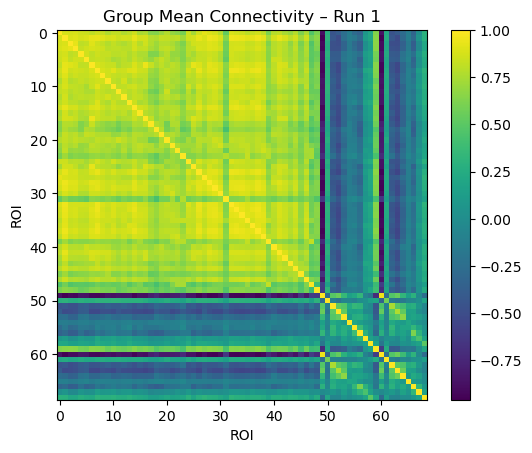

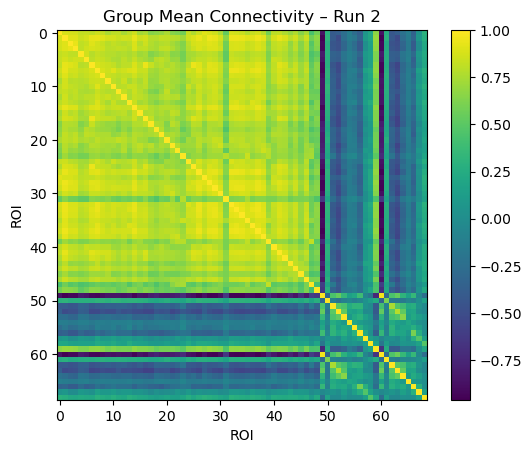

In [ ]:
import os, glob
import numpy as np
import pandas as pd

# ————————————————
# 0. Paths & patterns
# ————————————————
base_dir     = '/Users/lyanne/EmpathicPain'
run1_pattern = os.path.join(base_dir, 'sub-*_run-01_connectivity.csv')
run1_files   = sorted(glob.glob(run1_pattern))

subject_list = [os.path.basename(f).split('_run-01_connectivity.csv')[0] 
                for f in run1_files]
n_subj = len(subject_list)

# ————————————————
# 1. Load all subject matrices into conn_all
# ————————————————
conn_all = np.zeros((n_subj, 2, 69, 69))
for i, subj in enumerate(subject_list):
    fn1 = os.path.join(base_dir, f"{subj}_run-01_connectivity.csv")
    fn2 = os.path.join(base_dir, f"{subj}_run-02_connectivity.csv")
    
    mat1 = pd.read_csv(fn1, header=None, skiprows=1).values
    mat2 = pd.read_csv(fn2, header=None, skiprows=1).values
    
    assert mat1.shape == (69, 69)
    assert mat2.shape == (69, 69)
    
    conn_all[i, 0] = mat1
    conn_all[i, 1] = mat2

# ————————————————
# 2. Compute the group‐mean connectivity for each run
# ————————————————
# axis=0 averages across subjects
mean_run1 = conn_all[:, 0, :, :].mean(axis=0)
mean_run2 = conn_all[:, 1, :, :].mean(axis=0)

# ————————————————
# 3. (Optional) Label rows/columns and save to CSV
# ————————————————
# If you have your 69 region labels in a list `labels`, you can do:
labels = [
    'Frontal Pole', 'Insular Cortex', 'Superior Frontal Gyrus',
    'Middle Frontal Gyrus', 'Inferior Frontal Gyrus, pars triangularis',
    'Inferior Frontal Gyrus, pars opercularis', 'Precentral Gyrus',
    'Temporal Pole', 'Superior Temporal Gyrus, anterior division',
    'Superior Temporal Gyrus, posterior division',
    'Middle Temporal Gyrus, anterior division',
    'Middle Temporal Gyrus, posterior division',
    'Middle Temporal Gyrus, temporooccipital part',
    'Inferior Temporal Gyrus, anterior division',
    'Inferior Temporal Gyrus, posterior division',
    'Inferior Temporal Gyrus, temporooccipital part',
    'Postcentral Gyrus', 'Superior Parietal Lobule',
    'Supramarginal Gyrus, anterior division',
    'Supramarginal Gyrus, posterior division', 'Angular Gyrus',
    'Lateral Occipital Cortex, superior division',
    'Lateral Occipital Cortex, inferior division',
    'Intracalcarine Cortex', 'Frontal Medial Cortex',
    'Juxtapositional Lobule Cortex (formerly Supplementary Motor Cortex)',
    'Subcallosal Cortex', 'Paracingulate Gyrus',
    'Cingulate Gyrus, anterior division',
    'Cingulate Gyrus, posterior division', 'Precuneous Cortex',
    'Cuneal Cortex', 'Frontal Orbital Cortex',
    'Parahippocampal Gyrus, anterior division',
    'Parahippocampal Gyrus, posterior division', 'Lingual Gyrus',
    'Temporal Fusiform Cortex, anterior division',
    'Temporal Fusiform Cortex, posterior division',
    'Temporal Occipital Fusiform Cortex', 'Occipital Fusiform Gyrus',
    'Frontal Opercular Cortex', 'Central Opercular Cortex',
    'Parietal Opercular Cortex', 'Planum Polare',
    "Heschl's Gyrus (includes H1 and H2)", 'Planum Temporale',
    'Supracalcarine Cortex', 'Occipital Pole',
    'Left Cerebral White Matter', 'Left Cerebral Cortex',
    'Left Lateral Ventricle', 'Left Thalamus', 'Left Caudate',
    'Left Putamen', 'Left Pallidum', 'Brain-Stem', 'Left Hippocampus',
    'Left Amygdala', 'Left Accumbens', 'Right Cerebral White Matter',
    'Right Cerebral Cortex', 'Right Lateral Ventricle', 'Right Thalamus',
    'Right Caudate', 'Right Putamen', 'Right Pallidum',
    'Right Hippocampus', 'Right Amygdala', 'Right Accumbens'
]

df_mean1 = pd.DataFrame(mean_run1, index=labels, columns=labels)
df_mean2 = pd.DataFrame(mean_run2, index=labels, columns=labels)

df_mean1.to_csv(os.path.join(base_dir, 'group_mean_run-01_connectivity.csv'))
df_mean2.to_csv(os.path.join(base_dir, 'group_mean_run-02_connectivity.csv'))


import matplotlib.pyplot as plt


# Plot Run 1
plt.figure()
plt.imshow(df_mean1, aspect='equal')
plt.title('Group Mean Connectivity – Self Pain')
plt.xlabel('ROI')
plt.ylabel('ROI')
plt.colorbar()
plt.show()

# Plot Run 2
plt.figure()
plt.imshow(df_mean2, aspect='equal')
plt.title('Group Mean Connectivity – Other Pain')
plt.xlabel('ROI')
plt.ylabel('ROI')
plt.colorbar()
plt.show()




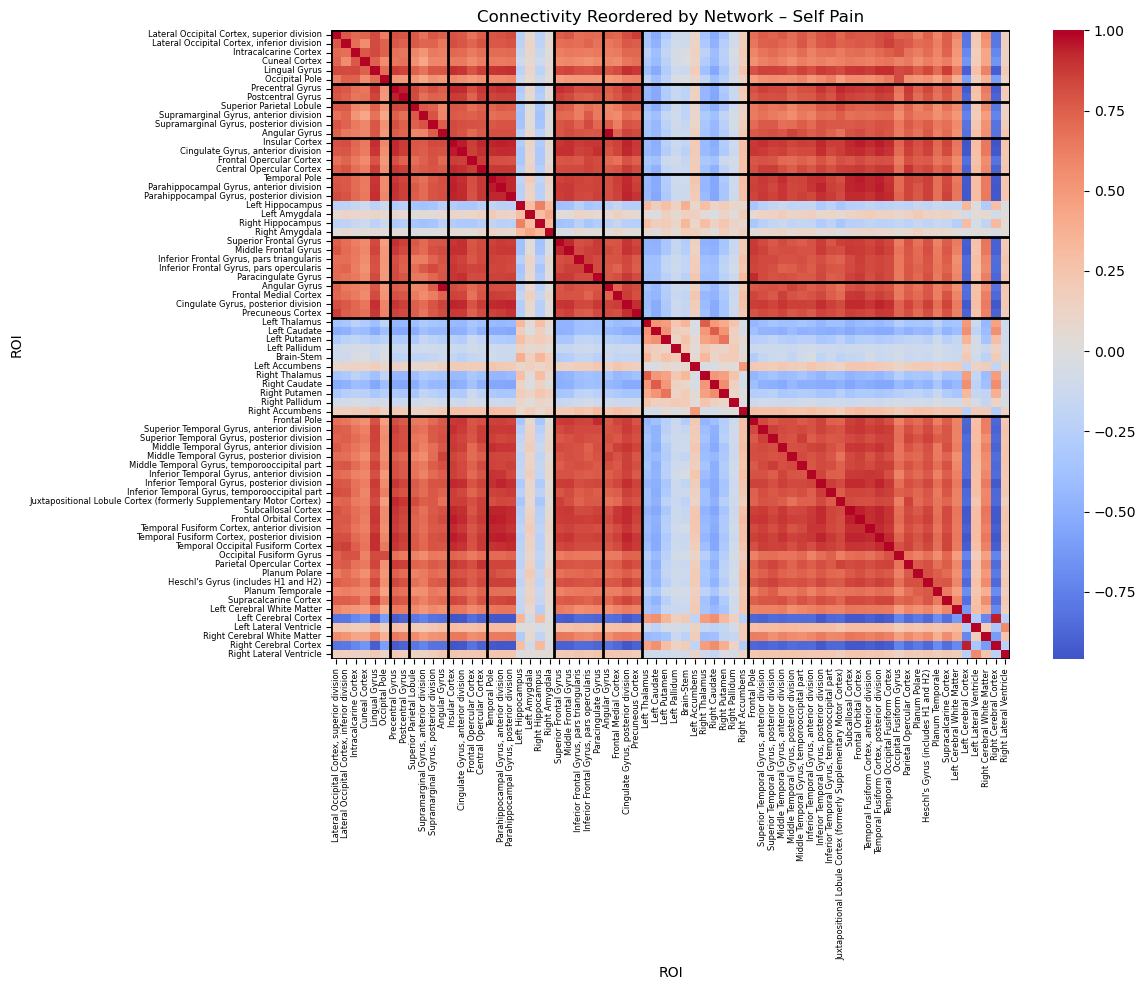

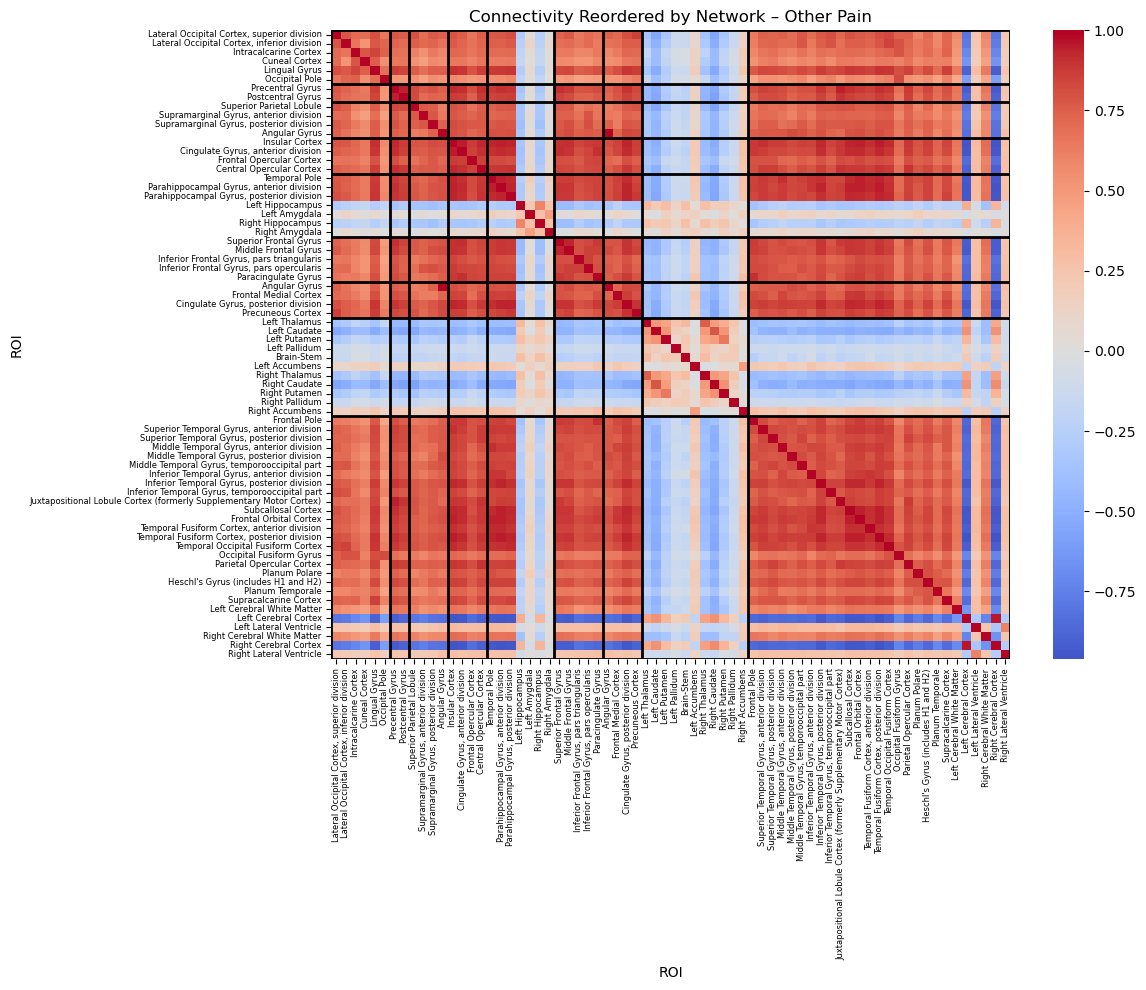

In [15]:
import os, glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ————————————————
# Load your group-mean matrices & labels
# ————————————————
base_dir = '/Users/lyanne/EmpathicPain'
df_mean1 = pd.read_csv(os.path.join(base_dir, 'group_mean_run-01_connectivity.csv'),
                       index_col=0)
df_mean2 = pd.read_csv(os.path.join(base_dir, 'group_mean_run-02_connectivity.csv'),
                       index_col=0)
labels   = list(df_mean1.index)

# ————————————————
# 1. Define your networks (Yeo-7 + Subcortical) 
# ————————————————
networks = {
    'Visual': [
        'Lateral Occipital Cortex, superior division',
        'Lateral Occipital Cortex, inferior division',
        'Intracalcarine Cortex',
        'Cuneal Cortex',
        'Lingual Gyrus',
        'Occipital Pole'
    ],
    'Somatomotor': [
        'Precentral Gyrus',
        'Postcentral Gyrus',
        'Juxtapositional Lobule Cortex'
    ],
    'Dorsal Attention': [
        'Superior Parietal Lobule',
        'Supramarginal Gyrus, anterior division',
        'Supramarginal Gyrus, posterior division',
        'Angular Gyrus'
    ],
    'Ventral Attention/Salience': [
        'Insular Cortex',
        'Frontal Opercular Cortex',
        'Central Opercular Cortex',
        'Cingulate Gyrus, anterior division'
    ],
    'Limbic': [
        'Temporal Pole',
        'Parahippocampal Gyrus, anterior division',
        'Parahippocampal Gyrus, posterior division',
        'Left Amygdala',
        'Right Amygdala',
        'Left Hippocampus',
        'Right Hippocampus'
    ],
    'Frontoparietal': [
        'Superior Frontal Gyrus',
        'Middle Frontal Gyrus',
        'Inferior Frontal Gyrus, pars triangularis',
        'Inferior Frontal Gyrus, pars opercularis',
        'Paracingulate Gyrus'
    ],
    'Default Mode': [
        'Frontal Medial Cortex',
        'Precuneous Cortex',
        'Cingulate Gyrus, posterior division',
        'Angular Gyrus'
    ],
    'Subcortical': [
        'Left Thalamus',
        'Right Thalamus',
        'Left Caudate',
        'Right Caudate',
        'Left Putamen',
        'Right Putamen',
        'Left Pallidum',
        'Right Pallidum',
        'Left Accumbens',
        'Right Accumbens',
        'Brain-Stem'
    ]
}

# ————————————————
# 2. Build ROI→network lookup & ordering
# ————————————————
roi_network = {roi: net
               for net, rois in networks.items()
               for roi in rois}

network_order = list(networks.keys())
ordered_labels = []
boundaries = []

# add each network's ROIs in turn
for net in network_order:
    rois = [roi for roi in labels if roi in networks[net]]
    boundaries.append(len(ordered_labels))
    ordered_labels.extend(rois)

# any remaining ROIs as "Others" at the end
boundaries.append(len(ordered_labels))
others = [roi for roi in labels if roi not in roi_network]
ordered_labels.extend(others)
boundaries.append(len(ordered_labels))

# ————————————————
# 3. Reorder & plot heatmaps with network block lines
# ————————————————
for df, cond in zip([df_mean1, df_mean2], ['Self Pain', 'Other Pain']):
    mat = df.loc[ordered_labels, ordered_labels].values
    plt.figure(figsize=(12,10))
    ax = sns.heatmap(mat,
                     cmap='coolwarm',
                     center=0,
                     xticklabels=ordered_labels,
                     yticklabels=ordered_labels)
    # make labels legible
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=6)
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=6)
    # draw thick lines at network boundaries
    for b in boundaries:
        ax.hlines(b, *ax.get_xlim(), colors='black', linewidth=2)
        ax.vlines(b, *ax.get_ylim(), colors='black', linewidth=2)
    plt.title(f'Connectivity Reordered by Network – {cond}')
    plt.xlabel('ROI'); plt.ylabel('ROI')
    plt.tight_layout()
    plt.show()


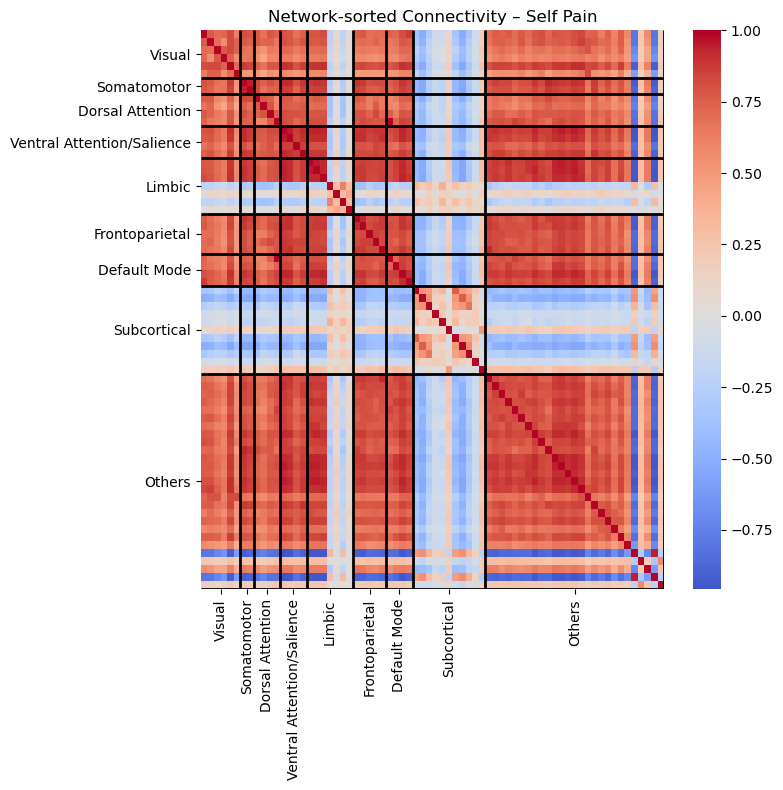

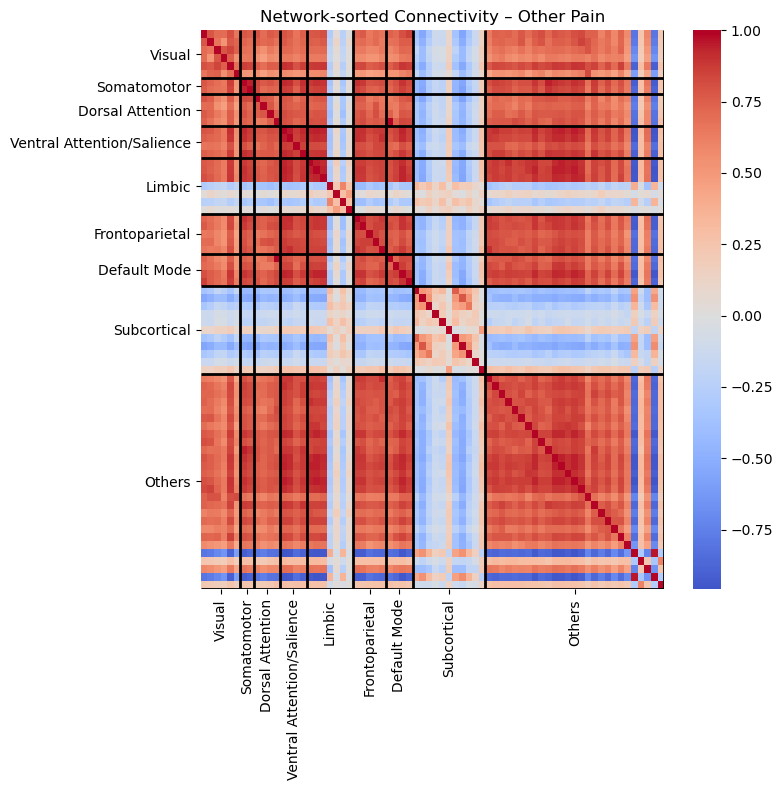

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# — assume df_mean1, df_mean2 (69×69 DataFrames) and labels = list(df_mean1.index) are already defined —

# 1. Define your networks (Yeo-7 + Subcortical)
networks = {
    'Visual': [
        'Lateral Occipital Cortex, superior division',
        'Lateral Occipital Cortex, inferior division',
        'Intracalcarine Cortex',
        'Cuneal Cortex',
        'Lingual Gyrus',
        'Occipital Pole'
    ],
    'Somatomotor': [
        'Precentral Gyrus',
        'Postcentral Gyrus',
        'Juxtapositional Lobule Cortex'
    ],
    'Dorsal Attention': [
        'Superior Parietal Lobule',
        'Supramarginal Gyrus, anterior division',
        'Supramarginal Gyrus, posterior division',
        'Angular Gyrus'
    ],
    'Ventral Attention/Salience': [
        'Insular Cortex',
        'Frontal Opercular Cortex',
        'Central Opercular Cortex',
        'Cingulate Gyrus, anterior division'
    ],
    'Limbic': [
        'Temporal Pole',
        'Parahippocampal Gyrus, anterior division',
        'Parahippocampal Gyrus, posterior division',
        'Left Amygdala',
        'Right Amygdala',
        'Left Hippocampus',
        'Right Hippocampus'
    ],
    'Frontoparietal': [
        'Superior Frontal Gyrus',
        'Middle Frontal Gyrus',
        'Inferior Frontal Gyrus, pars triangularis',
        'Inferior Frontal Gyrus, pars opercularis',
        'Paracingulate Gyrus'
    ],
    'Default Mode': [
        'Frontal Medial Cortex',
        'Precuneous Cortex',
        'Cingulate Gyrus, posterior division',
        'Angular Gyrus'
    ],
    'Subcortical': [
        'Left Thalamus',
        'Right Thalamus',
        'Left Caudate',
        'Right Caudate',
        'Left Putamen',
        'Right Putamen',
        'Left Pallidum',
        'Right Pallidum',
        'Left Accumbens',
        'Right Accumbens',
        'Brain-Stem'
    ]
}

# 2. Build a lookup of ROI→network
roi_to_net = {roi: net for net, rois in networks.items() for roi in rois}

# 3. Order ROIs by network, then “Others”
ordered = []
block_sizes = []
for net in networks:
    this_rois = [r for r in labels if r in networks[net]]
    ordered.extend(this_rois)
    block_sizes.append(len(this_rois))
others = [r for r in labels if r not in roi_to_net]
ordered.extend(others)
block_sizes.append(len(others))

# 4. Compute boundaries and block centers
boundaries = np.cumsum(block_sizes)
starts     = boundaries - np.array(block_sizes)
centers    = starts + np.array(block_sizes) / 2
net_names  = list(networks.keys()) + ['Others']

# 5. Reorder your matrices
mat1 = df_mean1.loc[ordered, ordered].values
mat2 = df_mean2.loc[ordered, ordered].values

# 6. Plot helper
def plot_network_blocks(mat, title):
    fig, ax = plt.subplots(figsize=(8, 8))
    sns.heatmap(mat,
                cmap='coolwarm',
                center=0,
                xticklabels=False,
                yticklabels=False,
                ax=ax)
    # draw block boundary lines
    for b in boundaries:
        ax.hlines(b, *ax.get_xlim(), color='black', linewidth=2)
        ax.vlines(b, *ax.get_ylim(), color='black', linewidth=2)
    # label each block by network at its center
    ax.set_xticks(centers)
    ax.set_xticklabels(net_names, rotation=90)
    ax.set_yticks(centers)
    ax.set_yticklabels(net_names, rotation=0)
    ax.set_title(title)
    plt.tight_layout()

# 7. Generate the figures
plot_network_blocks(mat1, 'Network-sorted Connectivity – Self Pain')
plot_network_blocks(mat2, 'Network-sorted Connectivity – Other Pain')
plt.show()


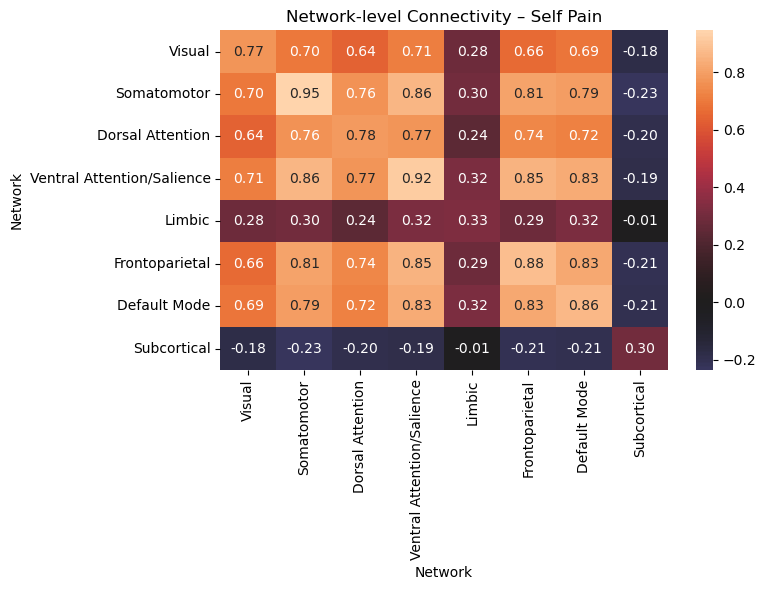

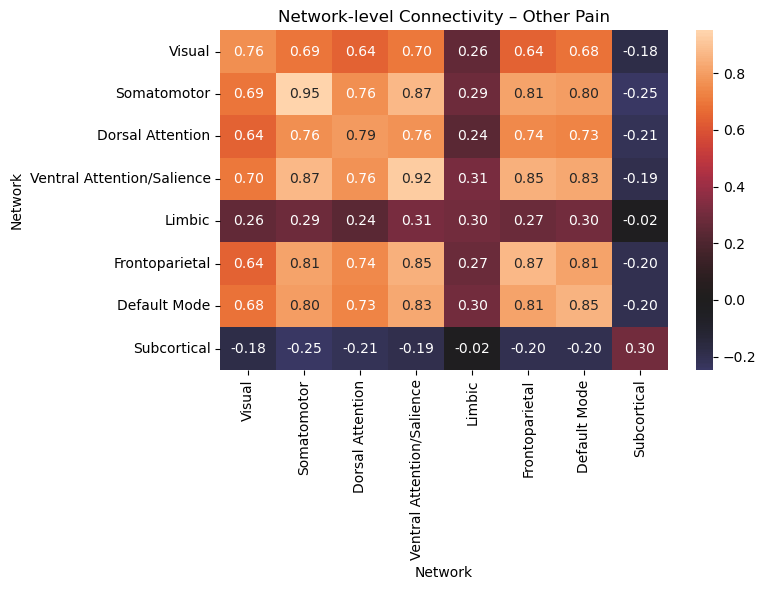

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# 1. Standard Yeo-7 + Subcortical networks
networks = {
    'Visual': [
        'Lateral Occipital Cortex, superior division',
        'Lateral Occipital Cortex, inferior division',
        'Intracalcarine Cortex',
        'Cuneal Cortex',
        'Lingual Gyrus',
        'Occipital Pole'
    ],
    'Somatomotor': [
        'Precentral Gyrus',
        'Postcentral Gyrus',
        'Juxtapositional Lobule Cortex (formerly Supplementary Motor Cortex)'
    ],
    'Dorsal Attention': [
        'Superior Parietal Lobule',
        'Supramarginal Gyrus, anterior division',
        'Supramarginal Gyrus, posterior division',
        'Angular Gyrus'
    ],
    'Ventral Attention/Salience': [
        'Insular Cortex',
        'Frontal Opercular Cortex',
        'Central Opercular Cortex',
        'Cingulate Gyrus, anterior division'
    ],
    'Limbic': [
        'Left Amygdala',
        'Right Amygdala',
        'Left Hippocampus',
        'Right Hippocampus',
        'Parahippocampal Gyrus, anterior division',
        'Parahippocampal Gyrus, posterior division',
        'Temporal Pole'
    ],
    'Frontoparietal': [
        'Superior Frontal Gyrus',
        'Middle Frontal Gyrus',
        'Inferior Frontal Gyrus, pars triangularis',
        'Inferior Frontal Gyrus, pars opercularis',
        'Paracingulate Gyrus'
    ],
    'Default Mode': [
        'Frontal Medial Cortex',
        'Precuneous Cortex',
        'Cingulate Gyrus, posterior division',
        'Angular Gyrus',
        'Paracingulate Gyrus'
    ],
    'Subcortical': [
        'Left Thalamus',
        'Right Thalamus',
        'Left Caudate',
        'Right Caudate',
        'Left Putamen',
        'Right Putamen',
        'Left Pallidum',
        'Right Pallidum',
        'Left Accumbens',
        'Right Accumbens',
        'Brain-Stem'
    ]
}

# 2. Map ROI names → indices
roi_to_idx = {roi: idx for idx, roi in enumerate(labels)}
network_indices = {
    net: [roi_to_idx[roi] for roi in rois if roi in roi_to_idx]
    for net, rois in networks.items()
}

# 3. Block‐average function
def block_average(conn, net_inds):
    names = list(net_inds.keys())
    n = len(names)
    M = np.zeros((n, n))
    for i, n1 in enumerate(names):
        for j, n2 in enumerate(names):
            inds1 = net_inds[n1]
            inds2 = net_inds[n2]
            M[i, j] = conn[np.ix_(inds1, inds2)].mean()
    return M, names

# 4. Compute blocks for Run1/Run2
block1, net_names = block_average(df_mean1.values, network_indices)
block2, _         = block_average(df_mean2.values, network_indices)

# 5. Plot
for blk, cond in zip([block1, block2], ['Self Pain', 'Other Pain']):
    plt.figure(figsize=(8, 6))
    sns.heatmap(blk,
                xticklabels=net_names,
                yticklabels=net_names,
                center=0,
                annot=True, fmt=".2f")
    plt.title(f'Network‐level Connectivity – {cond}')
    plt.xlabel('Network'); plt.ylabel('Network')
    plt.tight_layout()
    plt.show()


In [3]:
import numpy as np

def threshold_proportional(mat, density):
    """
    Keeps only the top `density` fraction of absolute weights in `mat`.
    mat : square, symmetric 2D array (ROI×ROI)
    density : float between 0 and 1
    returns a new matrix with the same shape, zeroed below threshold
    """
    # 1. copy and zero diagonal
    M = mat.copy()
    np.fill_diagonal(M, 0)
    
    # 2. get all off‐diagonal absolute values (upper triangle)
    iu = np.triu_indices_from(M, k=1)
    abs_vals = np.abs(M[iu])
    
    # 3. find cutoff so that only `density` fraction remain
    cutoff = np.percentile(abs_vals, 100 * (1 - density))
    
    # 4. zero out everything with abs < cutoff
    M[np.abs(M) < cutoff] = 0
    
    # 5. (optional) re‐symmetrize to ensure perfect symmetry
    M = np.maximum(M, M.T)
    return M


# assume conn_all.shape == (n_subj, 2, 69, 69)
n_subj = conn_all.shape[0]
n_runs = conn_all.shape[1]

# pre‐allocate
threshold_conn_all = np.zeros_like(conn_all)

# choose your density
density = 0.20  # e.g. keep top 10% of edges

for i in range(n_subj):
    for run in range(n_runs):
        threshold_conn_all[i, run] = threshold_proportional(
            conn_all[i, run],
            density=density
        )

print("Thresholded connectivity shape:", threshold_conn_all.shape)
# → (n_subj, 2, 69, 69)



Thresholded connectivity shape: (53, 2, 69, 69)


In [4]:
# find indices of ROIs of interest

# ————————————————
# 1. full atlas labels
# ————————————————
labels = [
    'Frontal Pole', 'Insular Cortex', 'Superior Frontal Gyrus',
    'Middle Frontal Gyrus', 'Inferior Frontal Gyrus, pars triangularis',
    'Inferior Frontal Gyrus, pars opercularis', 'Precentral Gyrus',
    'Temporal Pole', 'Superior Temporal Gyrus, anterior division',
    'Superior Temporal Gyrus, posterior division',
    'Middle Temporal Gyrus, anterior division',
    'Middle Temporal Gyrus, posterior division',
    'Middle Temporal Gyrus, temporooccipital part',
    'Inferior Temporal Gyrus, anterior division',
    'Inferior Temporal Gyrus, posterior division',
    'Inferior Temporal Gyrus, temporooccipital part',
    'Postcentral Gyrus', 'Superior Parietal Lobule',
    'Supramarginal Gyrus, anterior division',
    'Supramarginal Gyrus, posterior division', 'Angular Gyrus',
    'Lateral Occipital Cortex, superior division',
    'Lateral Occipital Cortex, inferior division',
    'Intracalcarine Cortex', 'Frontal Medial Cortex',
    'Juxtapositional Lobule Cortex (formerly Supplementary Motor Cortex)',
    'Subcallosal Cortex', 'Paracingulate Gyrus',
    'Cingulate Gyrus, anterior division',
    'Cingulate Gyrus, posterior division', 'Precuneous Cortex',
    'Cuneal Cortex', 'Frontal Orbital Cortex',
    'Parahippocampal Gyrus, anterior division',
    'Parahippocampal Gyrus, posterior division', 'Lingual Gyrus',
    'Temporal Fusiform Cortex, anterior division',
    'Temporal Fusiform Cortex, posterior division',
    'Temporal Occipital Fusiform Cortex', 'Occipital Fusiform Gyrus',
    'Frontal Opercular Cortex', 'Central Opercular Cortex',
    'Parietal Opercular Cortex', 'Planum Polare',
    "Heschl's Gyrus (includes H1 and H2)", 'Planum Temporale',
    'Supracalcarine Cortex', 'Occipital Pole',
    'Left Cerebral White Matter', 'Left Cerebral Cortex',
    'Left Lateral Ventricle', 'Left Thalamus', 'Left Caudate',
    'Left Putamen', 'Left Pallidum', 'Brain-Stem', 'Left Hippocampus',
    'Left Amygdala', 'Left Accumbens', 'Right Cerebral White Matter',
    'Right Cerebral Cortex', 'Right Lateral Ventricle', 'Right Thalamus',
    'Right Caudate', 'Right Putamen', 'Right Pallidum',
    'Right Hippocampus', 'Right Amygdala', 'Right Accumbens'
]

# ————————————————
# 2. Specify the exact labels you want
# ————————————————
rois_of_interest = [
    'Insular Cortex',                          # AI
    'Cingulate Gyrus, anterior division',      # ACC
    'Brain-Stem',                              # LC (approximate)
    'Left Accumbens',                          # NAc, left
    'Right Accumbens',                         # NAc, right
    'Cingulate Gyrus, posterior division',     # MCC (approximate)
    'Inferior Frontal Gyrus, pars triangularis',   # IFG pars triangularis
    'Inferior Frontal Gyrus, pars opercularis',    # IFG pars opercularis
    'Frontal Medial Cortex',                   # medial frontal gyrus
    'Postcentral Gyrus'                        # postcentral gyrus
]

# ————————————————
# 3. Find their indices
# ————————————————
roi_indices = []
found_labels = []

for roi in rois_of_interest:
    try:
        idx = labels.index(roi)
        roi_indices.append(idx)
        found_labels.append(roi)
    except ValueError:
        print(f"Warning: '{roi}' not found in labels list.")

# ————————————————
# 4. Output
# ————————————————
print("ROI indices: ", roi_indices)
print("ROI names:   ", found_labels)


ROI indices:  [1, 28, 55, 58, 68, 29, 4, 5, 24, 16]
ROI names:    ['Insular Cortex', 'Cingulate Gyrus, anterior division', 'Brain-Stem', 'Left Accumbens', 'Right Accumbens', 'Cingulate Gyrus, posterior division', 'Inferior Frontal Gyrus, pars triangularis', 'Inferior Frontal Gyrus, pars opercularis', 'Frontal Medial Cortex', 'Postcentral Gyrus']
